#**Kelompok METAVERSE **

- M Fajrul Nugraha (2101211030)
- Raden Rogers Dwiputra Setiady (2101211014)
- Musrinah (2101211009)



Implementasi Metode Nearest Neighbor untuk 
optimasi rute pencatatan meter air pelanggan PDAM, Studi Kasus PDAM Kabupaten Madiun

In [2]:
import numpy as np

# euclidian distance
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) for p in range(len(r))])

two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def nearestNeighbor(cities,improvement_threshold): 
    route = np.arange(cities.shape[0]) 
    improvement_factor = 1 
    best_distance = path_distance(route,cities) 
    
    while improvement_factor > improvement_threshold: 
        distance_to_beat = best_distance 
        
        for swap_first in range(1,len(route)-2): 
            for swap_last in range(swap_first+1,len(route)): 
                new_route = two_opt_swap(route,swap_first,swap_last) 
                new_distance = path_distance(new_route,cities) 
                
                if new_distance < best_distance: 
                    route = new_route 
                    best_distance = new_distance 
        improvement_factor = 1 - best_distance/distance_to_beat 
    return route 

In [3]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [26]:
import pandas as pd
cities2= pd.read_csv("/content/drive/MyDrive/Python/Data Pelanggan PDAM 100.csv")
cities2


,no_sambungan,nama_pelanggan,alamat_pelanggan,latitude_catat,longitude_catat,username_cater
0,1,"""Kantor PDAM Jiwan""","""Dusun II Kwangsen Kec. Jiwan""",-7.619891,111.481573,kantor
1,1000000235,"ABDULLAH HASAN, H",JL.SETIA BHAKTI RT 14 JWN,-7.624358,111.489856,hendra
2,1000000322,SUKRI,JL.BRNJANGAN/17 RT 21 JWN,-7.626448,111.492113,hendra
3,1000000228,SUYANTO,JL.SETIA BHAKTI RT 31 JWN,-7.628417,111.494999,hendra
4,1000000222,MOCH YASIN,JL.ST.KARYA 18 RT 16 JWN,-7.625115,111.487091,hendra
...,...,...,...,...,...,...
96,1000000068,IMAM HAMBALI,JL.SWADAYA RT 32 JIWAN,-7.627620,111.495790,hendra
97,1000000268,KADAR,JL.KARYAWAN RT 02 JIWAN,-7.621787,111.491045,hendra
98,1000000269,SUTARJO,JL.KARYAWAN RT 02 JIWAN,-7.623488,111.490687,hendra
99,1000000220,M JUHDI,JL.R.SOLO RT 01 JIWAN,-7.623838,111.490803,hendra


# **Converting Longitude and Latitude into Cartesian X and Y**

** R of earth =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html
 
 
 


In [27]:

from math import radians,cos,sin

lat =cities2["latitude_catat"].map(radians)
lon = cities2["longitude_catat"].map(radians)
y = lon.map(cos)*lat.map(cos)*6371
x = lon.map(cos)*lat.map(sin)*6371

cities2["lat_radians"] = lat
cities2["lon_radians"] = lon
cities2["x"] = x
cities2["y"] = y
cities2.head()

,no_sambungan,nama_pelanggan,alamat_pelanggan,latitude_catat,longitude_catat,username_cater,lat_radians,lon_radians,x,y
0,1,"""Kantor PDAM Jiwan""","""Dusun II Kwangsen Kec. Jiwan""",-7.619891,111.481573,kantor,-0.132992,1.945721,309.366604,-2312.470766
1,1000000235,"ABDULLAH HASAN, H",JL.SETIA BHAKTI RT 14 JWN,-7.624358,111.489856,hendra,-0.133070,1.945865,309.660614,-2313.296064
2,1000000322,SUKRI,JL.BRNJANGAN/17 RT 21 JWN,-7.626448,111.492113,hendra,-0.133107,1.945904,309.775996,-2313.516250
3,1000000228,SUYANTO,JL.SETIA BHAKTI RT 31 JWN,-7.628417,111.494999,hendra,-0.133141,1.945955,309.895111,-2313.801473
4,1000000222,MOCH YASIN,JL.ST.KARYA 18 RT 16 JWN,-7.625115,111.487091,hendra,-0.133083,1.945817,309.653225,-2313.008450


In [28]:
cities = cities2.drop(["no_sambungan", "nama_pelanggan", "alamat_pelanggan", "latitude_catat", "longitude_catat", "username_cater", "lat_radians", "lon_radians"], 1)
cities.head(6)

,x,y
0,309.366604,-2312.470766
1,309.660614,-2313.296064
2,309.775996,-2313.516250
3,309.895111,-2313.801473
4,309.653225,-2313.008450
5,309.622860,-2312.935871


In [29]:
df = cities.copy()


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2'])



In [31]:
cities = np.asarray(cities)


In [32]:
scaled = np.asarray(scaled_df)


In [33]:
route = nearestNeighbor(scaled,0.001)
route

array([  0,  74,  77,  44,   6,  55,  34,  33,   7,  48,  28,  30,  92,
         5,   4,  75,  31,  14,  78,  46,  80,  17,  50,  68,  67,   8,
        61,  53,  47,   3,  96,  86,  94,  42,  76, 100,   2,  60,  71,
        93,  26,  15,  91,  63,  25,  64,  27,  32,  43,  95,  90,  58,
        99,  98,  84,   1,  59,  83,  89,  51,  57,  54,  62,  56,  79,
        38,  69,  39,  70,  41,  97,  40,  16,  52,  49,  45,  23,  22,
        24,  18,  19,  21,  20,  11,  12,  13,  10,  29,   9,  65,  85,
        37,  81,  66,  72,  36,  73,  82,  87,  88,  35])

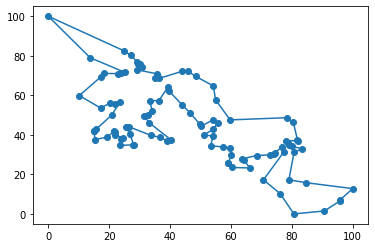

Route: [  0  74  77  44   6  55  34  33   7  48  28  30  92   5   4  75  31  14
  78  46  80  17  50  68  67   8  61  53  47   3  96  86  94  42  76 100
   2  60  71  93  26  15  91  63  25  64  27  32  43  95  90  58  99  98
  84   1  59  83  89  51  57  54  62  56  79  38  69  39  70  41  97  40
  16  52  49  45  23  22  24  18  19  21  20  11  12  13  10  29   9  65
  85  37  81  66  72  36  73  82  87  88  35]

Distance_scaled: 505.4198961034258


In [34]:
#PLOT IN CARTESIAN 


import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([scaled[route[i]] for i in range(len(route))]),np.array([scaled[0]])))
# Plot the cities.
plt.scatter(scaled[:,0],scaled[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance_scaled: " + str(path_distance(route,scaled)))


In [43]:
#unit of scale = ()Max (Lng or Lat) - Min(Lng or Lat)) /100
#unit of scale = 53.31km

Distance_km = path_distance(route,scaled) * 53.31
print(Distance_km)

#Jika kecepatan pencatat meter 5 KM / Jam dan Setiap mencatat meter membutuhkan waktu 10 menit maka total waktu yang dibutuhkan untuk mencatat seluruhnya adalah
totalWaktu = (Distance_km / 5) * 0.08
print(totalWaktu)

26.94393466127363
7.4311


In [36]:
order = pd.DataFrame(route, columns=["index"])
cities2["index"] = cities2.index
cities2
travel=order.merge(cities2, on = "index")




In [37]:

start= travel[0:1]
loop = travel.append(start)
loop


,index,no_sambungan,nama_pelanggan,alamat_pelanggan,latitude_catat,longitude_catat,username_cater,lat_radians,lon_radians,x,y
0,0,1,"""Kantor PDAM Jiwan""","""Dusun II Kwangsen Kec. Jiwan""",-7.619891,111.481573,kantor,-0.132992,1.945721,309.366604,-2312.470766
1,74,1000000194,SARIPIN,JL.BARAT RT 12 JIWAN,-7.622208,111.484283,hendra,-0.133033,1.945768,309.497327,-2312.736177
2,77,1000000247,SUWITO,JL.R.SOLO RT 12 JIWAN,-7.622411,111.484656,hendra,-0.133036,1.945774,309.510638,-2312.773344
3,44,1000000074,SOEPANGAT,JL.R.SOLO RT 12 JIWAN,-7.622490,111.485162,hendra,-0.133038,1.945783,309.520759,-2312.824749
4,6,1000000310,MBAH TUM,JL.R.SOLO RT 12 JIWAN,-7.622482,111.485291,hendra,-0.133037,1.945785,309.522216,-2312.838031
...,...,...,...,...,...,...,...,...,...,...,...
97,82,1000000063,SUTJIPTO,JL.SUMBERMORO RT 11 JIWAN,-7.621388,111.485970,hendra,-0.133018,1.945797,309.487378,-2312.913584
98,87,1000000062,SAPTO HURIP SUTRISNO,JL.SUMBERMORO RT 11 JIWAN,-7.621530,111.485903,hendra,-0.133021,1.945796,309.492183,-2312.905978
99,88,1000000061,"RB SUTEDJO, Ir",JL.SUMBERMORO RT 11 JIWAN,-7.621706,111.485883,hendra,-0.133024,1.945796,309.499009,-2312.902946
100,35,1000000141,"ARIS SUPARNO, Drs",JL.SMBRMORO RT 23 GRBOGAN,-7.620617,111.484730,hendra,-0.133005,1.945776,309.439217,-2312.790563


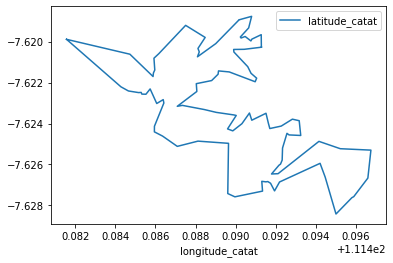

In [38]:
#PLOT IN LONGITUDE AND LATITUDE


loop.plot(kind="line", x="longitude_catat", y="latitude_catat")

In [ ]:
#WRITING CSV FILE WITH route

tsp = loop[["latitude_catat", "longitude_catat"]]

tsp.to_csv('tsp.csv', index=False)

from google.colab import files
files.download("tsp.csv")



